# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [ ]:
!pip install wbdata


In [ ]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
indicadores = {'TX.VAL.MANF.ZS.UN':'Exportacion_Manufacturas','TX.VAL.FOOD.ZS.UN':'Exportacion_Comida'}
#TX.VAL.MANF.ZS.UN                Manufactures exports (% of merchandise exports)
#TX.VAL.FOOD.ZS.UN                Food exports (% of merchandise exports)

data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])

df = pd.DataFrame(data=data)

In [ ]:
df

In [ ]:
# Dejamos índice como columnas
df.reset_index(inplace=True)
df

In [ ]:
print(df["date"].dtype) # no es numérica
df_2023 = df[df["date"]=="2023"]
df_2023

In [ ]:
df_2023 = df_2023.set_index(["country", "date"])
df_2023

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [ ]:
# Calcular el promedio de cada indicador
promedio_Manufacturas = df['Exportacion_Manufacturas'].mean()
promedio_Comida = df['Exportacion_Comida'].mean()

# Mostrar los promedios
print(f"Promedio de Exportación de manufacturas: {promedio_Manufacturas}")
print(f"Promedio de Exportación de comida: {promedio_Comida}")

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [ ]:
# Resolver acá estilo pyplot


In [ ]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

Promedio de Exportación de manufacturas: 46.60941306543591
Promedio de Exportación de comida: 36.43243168619345


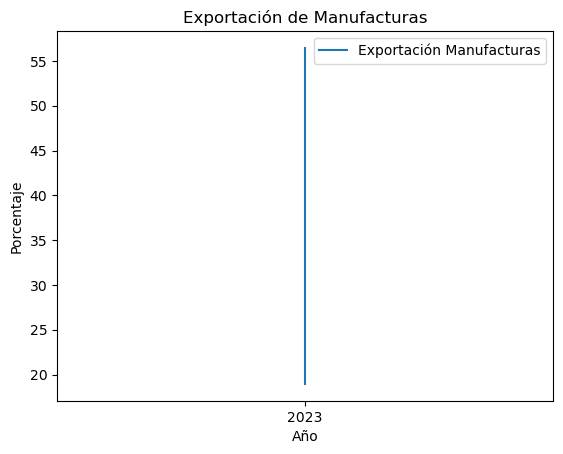

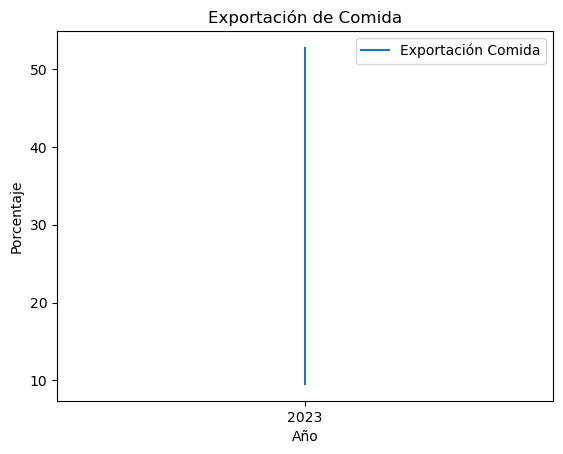

Archivo de links exportado.


In [3]:
# Parte A:

# Instalamos wbdata si no lo tenemos instalado
!pip install wbdata

# Importamos las librerías
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# Indicadores a consultar
indicadores = {
    'TX.VAL.MANF.ZS.UN': 'Exportacion_Manufacturas',
    'TX.VAL.FOOD.ZS.UN': 'Exportacion_Comida'
}

# Obtenemos los datos de USA y Argentina
data = wbdata.get_dataframe(indicadores, country=['USA', 'ARG'])

# Convertimos los datos en un DataFrame
df = pd.DataFrame(data=data)

# Cambiamos el índice y mostramos los primeros datos
df.reset_index(inplace=True)
df.head()

# Filtramos los datos para el año 2023
df_2023 = df[df["date"] == "2023"]

# Establecemos como índice el país y la fecha
df_2023 = df_2023.set_index(["country", "date"])

# Promedio de los indicadores
promedio_Manufacturas = df['Exportacion_Manufacturas'].mean()
promedio_Comida = df['Exportacion_Comida'].mean()

print(f"Promedio de Exportación de manufacturas: {promedio_Manufacturas}")
print(f"Promedio de Exportación de comida: {promedio_Comida}")

# Graficamos usando Matplotlib

# Gráfico estilo pyplot
plt.plot(df_2023.index.get_level_values("date"), df_2023['Exportacion_Manufacturas'], label="Exportación Manufacturas")
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.title('Exportación de Manufacturas')
plt.legend()
plt.show()

# Gráfico estilo orientado a objetos
fig, ax = plt.subplots()
ax.plot(df_2023.index.get_level_values("date"), df_2023['Exportacion_Comida'], label="Exportación Comida")
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje')
ax.set_title('Exportación de Comida')
ax.legend()
plt.show()

# Parte B:

# Instalamos las librerías para hacer scraping
!pip install requests
!pip install beautifulsoup4

import requests
from bs4 import BeautifulSoup

# Realizamos web scraping en la página de La Nación
url = 'https://www.lanacion.com.ar/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Obtenemos los links de las noticias
links = []
for a_tag in soup.find_all('a', href=True):
    link = a_tag['href']
    if link.startswith("/"):
        link = "https://www.lanacion.com.ar" + link
    links.append(link)

# Guardamos los links en un DataFrame
df_links = pd.DataFrame(links, columns=['Links'])

# Exportamos los links a un archivo Excel
df_links.to_excel('links_noticias.xlsx', index=False)
print("Archivo de links exportado.")